# ISMN data

Currently running in python 3.9(.11)

requirements:

pip intall ismn  
pip install Cartopy  
pip install matplotlib  
pip install numpy  

Resources:

Download ISMN data from: 
https://ismn.earth/en/

ISMN package documentation:
https://pypi.org/project/ismn/

Cartopy Documentation: 
https://scitools.org.uk/cartopy/docs/latest/

## Known bugs

There seems to be an issue when downloading either air temperature or snow depth data. The versions 1.4.* of ismn will spit out an error
abot date format when generating the metadata 



In [8]:
# Libraries
from ismn.interface import ISMN_Interface
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Global
%matplotlib inline

# Change to the directory where you have the ISMN zip downloaded.
data_path = (
    "../data/raw/Data_separate_files_header_20170101_20171231_10665_0t0D_20240415.zip"
)

In [2]:
import ismn

# I found a bug when generating the metadata if ismn version is not 1.3.0
ismn.__version__ == "1.3.0"

True

In [4]:
# This will take a while the first time, while the interface creates all the indeces.
ismn_data = ISMN_Interface(data_path, parallel=True)

Found existing ismn metadata in ..\data\raw\python_metadata\Data_separate_files_header_20170101_20171231_10665_0t0D_20240415.csv.


In [5]:
ismn_data.get_variables()

array(['soil_moisture', 'soil_temperature', 'surface_temperature'],
      dtype='<U32')

In [21]:
# Hierarchical structure: ismn_data[network][station][sensor]
ismn_data["ARM"]["Anthony"]["STP-1-A_soil_temperature_0.000000_0.050000"].data

# Sensor name codes for variable and depth: _<variable>_<start/ m>_<end/ m>.  https://ismn.earth/en/data/metadata/

c:\Users\andre\Desktop\VS_Code\PMW_LST\.venv\lib\site-packages\ismn\filehandlers.py:618: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  readf = lambda f: pd.read_csv(
c:\Users\andre\Desktop\VS_Code\PMW_LST\.venv\lib\site-packages\ismn\filehandlers.py:618: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  readf = lambda f: pd.read_csv(


,soil_temperature,soil_temperature_flag,soil_temperature_orig_flag
date_time,,,
2017-01-02 00:00:00,4.134180,G,M
2017-01-02 01:00:00,4.108790,G,M
2017-01-02 02:00:00,3.985600,G,M
2017-01-02 03:00:00,3.804640,G,M
2017-01-02 04:00:00,3.674370,G,M
...,...,...,...
2017-12-30 20:00:00,-0.637568,G,M
2017-12-30 21:00:00,-0.580889,G,M
2017-12-30 22:00:00,-0.520299,G,M


In [6]:
# Basic Query: select data by index and or metadata:

# Get the ids for the USCRN network and subset from the whole dataset.
ids = ismn_data.get_dataset_ids(
    variable=["surface_temperature", "soil_temperature"],
    filter_meta_dict={"network": "USCRN"},
)
uscrn_data = ismn_data.subset_from_ids(ids)

Found existing ismn metadata in ..\data\raw\python_metadata\Data_separate_files_header_20170101_20171231_10665_0t0D_20240415.csv.


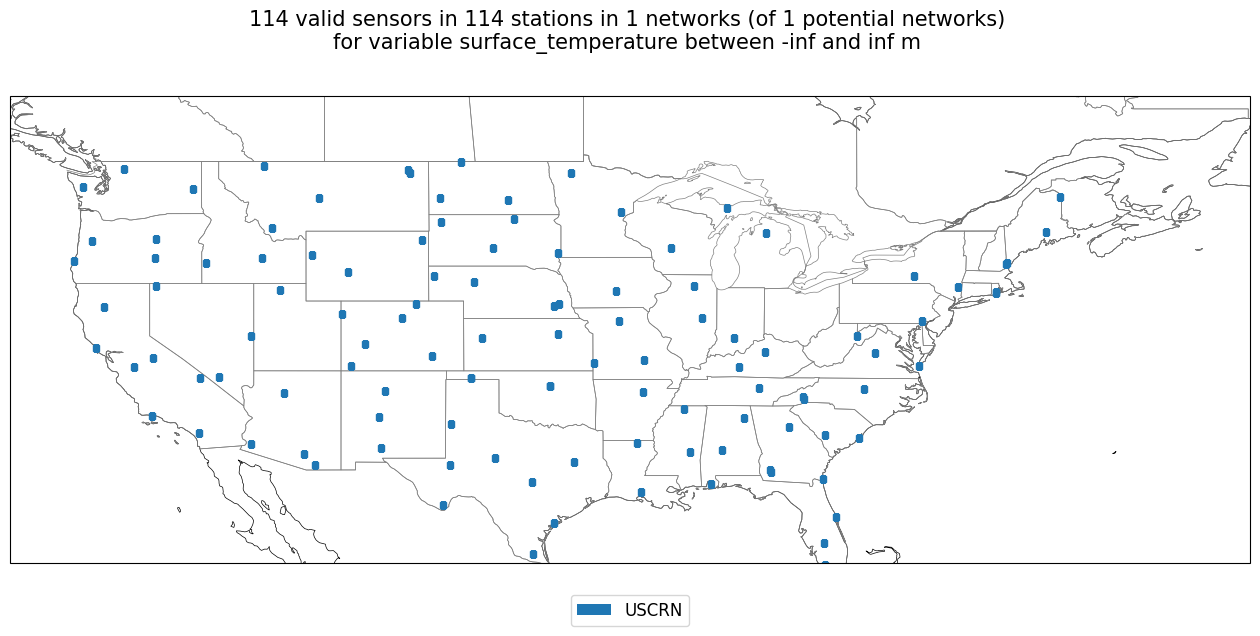

In [9]:
# Bonus: ismn has some nice compatibility with the cartopy package for plotting

# plot available station on a map
fig, ax = plt.subplots(
    1, 1, figsize=(16, 10), subplot_kw={"projection": ccrs.PlateCarree()}
)
uscrn_data.plot_station_locations(
    "surface_temperature", ax=ax, markersize=5, text_scalefactor=3
)
ax.set_extent([-128, -57, 26, 47])  # US aproximate coordinate range
plt.show()

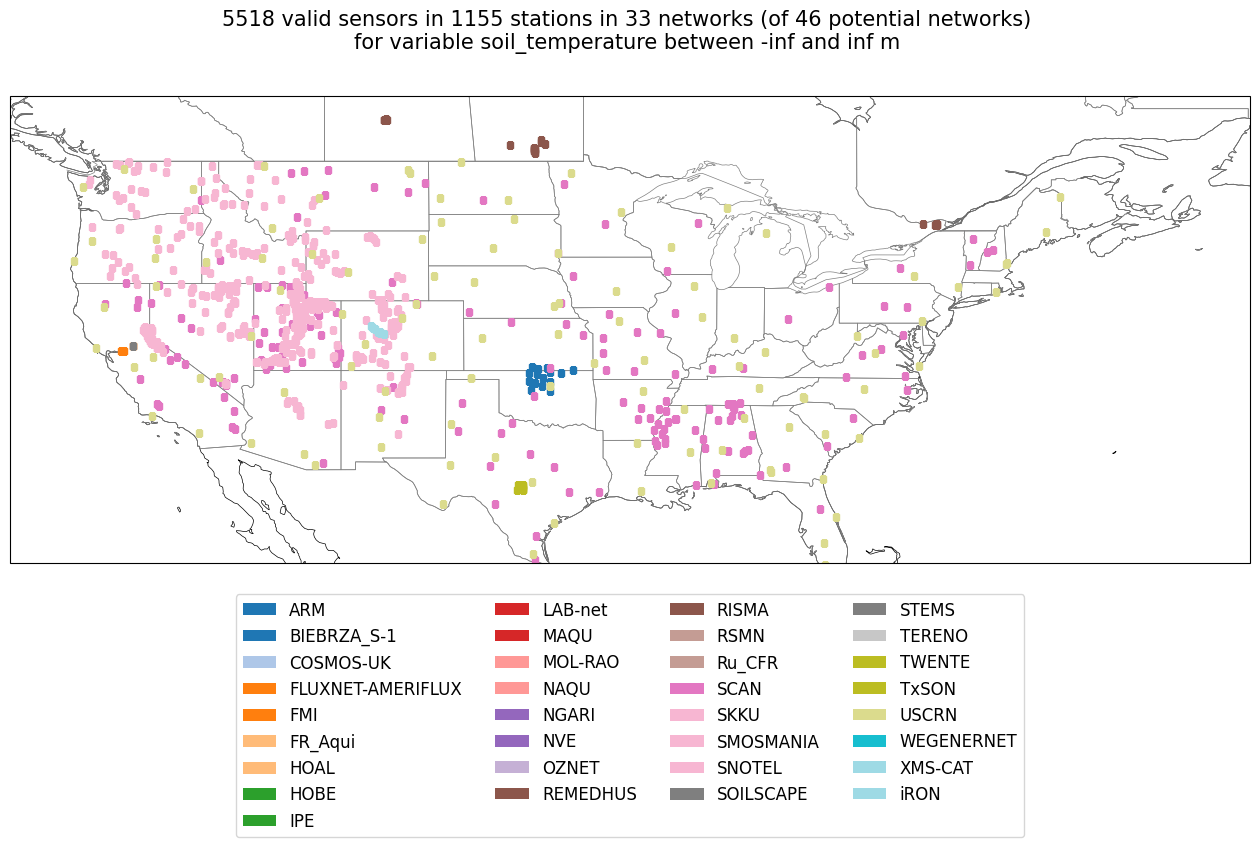

In [10]:
# Bonus: ismn has some nice compatibility with the cartopy package for plotting

# plot available station on a map
fig, ax = plt.subplots(
    1, 1, figsize=(16, 10), subplot_kw={"projection": ccrs.PlateCarree()}
)
ismn_data.plot_station_locations(
    "soil_temperature", ax=ax, markersize=5, text_scalefactor=3
)
ax.set_extent([-128, -57, 26, 47])  # US aproximate coordinate range
plt.show()

In [11]:
# To recover the data from the sensors we iterate using the collectioniter_sensors()
valid_sensors = []
for network, station, sensor in uscrn_data.collection.iter_sensors(depth=[0, 0]):
    if (
        np.min(sensor.data["surface_temperature"]) > -100
    ):  # Some data will have badly recovered LST
        valid_sensors.append((network, station, sensor))

len(valid_sensors)

""" 
Unfortunatly, the ISMN package is old and not updated too often, so using some pandas versions will cause this FutureWarning to appear:

[...] venv\lib\site-packages\ismn\filehandlers.py:659: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated.
Combine the desired columns with pd.to_datetime after parsing instead.
return pd.read_csv(
  
"""

c:\Users\andre\Desktop\VS_Code\PMW_LST\.venv\lib\site-packages\ismn\filehandlers.py:618: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  readf = lambda f: pd.read_csv(
c:\Users\andre\Desktop\VS_Code\PMW_LST\.venv\lib\site-packages\ismn\filehandlers.py:618: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  readf = lambda f: pd.read_csv(
c:\Users\andre\Desktop\VS_Code\PMW_LST\.venv\lib\site-packages\ismn\filehandlers.py:618: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  readf = lambda f: pd.read_csv(
c:\Users\andre\Desktop\VS_Code\PMW_LST\.venv\lib\site-packages\ismn\filehandlers.py:618: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated an

" \nUnfortunatly, the ISMN package is old and not updated too often, so using some pandas versions will cause this FutureWarning to appear:\n\n[...] venv\\lib\\site-packages\\ismn\x0cilehandlers.py:659: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated.\nCombine the desired columns with pd.to_datetime after parsing instead.\nreturn pd.read_csv(\n  \n"

In [12]:
# Extract ascending and descendig passes (6pm and 6am)

# Use the first sensor on the list as an example:
network, station, sensor = valid_sensors[0]

# This method returns a dataset for each sensor
timeseries = uscrn_data[network.name][station.name][sensor.name].data

# Filter by datetime index
ascending_ts = timeseries[timeseries.index.hour == 18]
descending_ts = timeseries[timeseries.index.hour == 6]

c:\Users\andre\Desktop\VS_Code\PMW_LST\.venv\lib\site-packages\ismn\filehandlers.py:618: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  readf = lambda f: pd.read_csv(
c:\Users\andre\Desktop\VS_Code\PMW_LST\.venv\lib\site-packages\ismn\filehandlers.py:618: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  readf = lambda f: pd.read_csv(


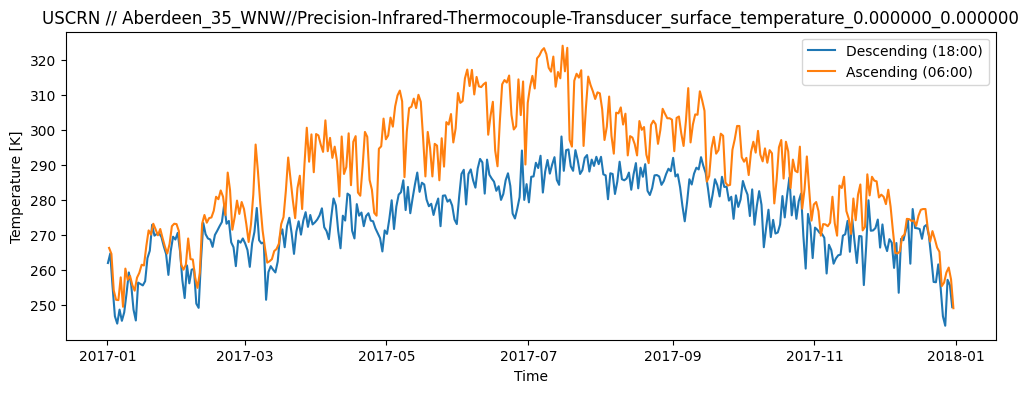

In [13]:
# Visualise 6pm-6am data from a station
fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(descending_ts["surface_temperature"] + 273.15, label="Descending (18:00)")
ax.plot(ascending_ts["surface_temperature"] + 273.15, label="Ascending (06:00)")
ax.set_ylabel("Temperature [K]")
ax.set_xlabel("Time")
ax.legend()

ax.set_title(network.name + " // " + station.name + "//" + sensor.name)

plt.show()

In [14]:
# Save all instruments in the selected network:

instruments = {}
for network, station, sensor in uscrn_data.collection.iter_sensors(depth=[0, 0]):
    if sensor.instrument in instruments.keys():
        instruments[sensor.instrument] += 1
    else:
        instruments[sensor.instrument] = 1

print(instruments)

{'Precision-Infrared-Thermocouple-Transducer': 114}


In [15]:
count = 0
instruments = {}
for s in ismn_data.stations_that_measure("soil_temperature"):
    count += 1
    if sensor.instrument in instruments.keys():
        instruments[sensor.instrument] += 1
    else:
        instruments[sensor.instrument] = 1

print(count)
print(instruments)

1155
{'Precision-Infrared-Thermocouple-Transducer': 1155}


In [20]:
instruments = {}

for network, station, sensor in ismn_data.collection.iter_sensors():
    if sensor.instrument in instruments.keys():
        instruments[sensor.instrument] += 1
    else:
        instruments[sensor.instrument] = 1

    print(sensor)

print(instruments)

CS616-1_soil_moisture_0.050000_0.050000
CS616-2_soil_moisture_0.050000_0.050000
CS616_soil_moisture_0.050000_0.050000
CS616_soil_moisture_0.100000_0.100000
CS616_soil_moisture_0.200000_0.200000
CS616_soil_moisture_0.400000_0.400000
CS616_soil_moisture_0.600000_0.600000
CS616_soil_moisture_1.000000_1.000000
CS616_soil_moisture_0.050000_0.050000
CS616_soil_moisture_0.600000_0.600000
CS616_soil_moisture_0.100000_0.100000
CS616_soil_moisture_0.400000_0.400000
CS616_soil_moisture_1.000000_1.000000
CS616_soil_moisture_0.050000_0.050000
CS616_soil_moisture_0.100000_0.100000
CS616_soil_moisture_0.200000_0.200000
CS616_soil_moisture_0.400000_0.400000
CS616_soil_moisture_0.050000_0.050000
CS616_soil_moisture_0.100000_0.100000
CS616_soil_moisture_0.200000_0.200000
CS616_soil_moisture_1.000000_1.000000
CS616_soil_moisture_0.100000_0.400000
CS616_soil_moisture_0.400000_0.700000
CS616_soil_moisture_0.700000_1.000000
CS616_soil_moisture_1.050000_1.350000
CS616-1_soil_moisture_0.050000_0.050000
CS616-

(None, <GeoAxes: >, (1, 114, 114))

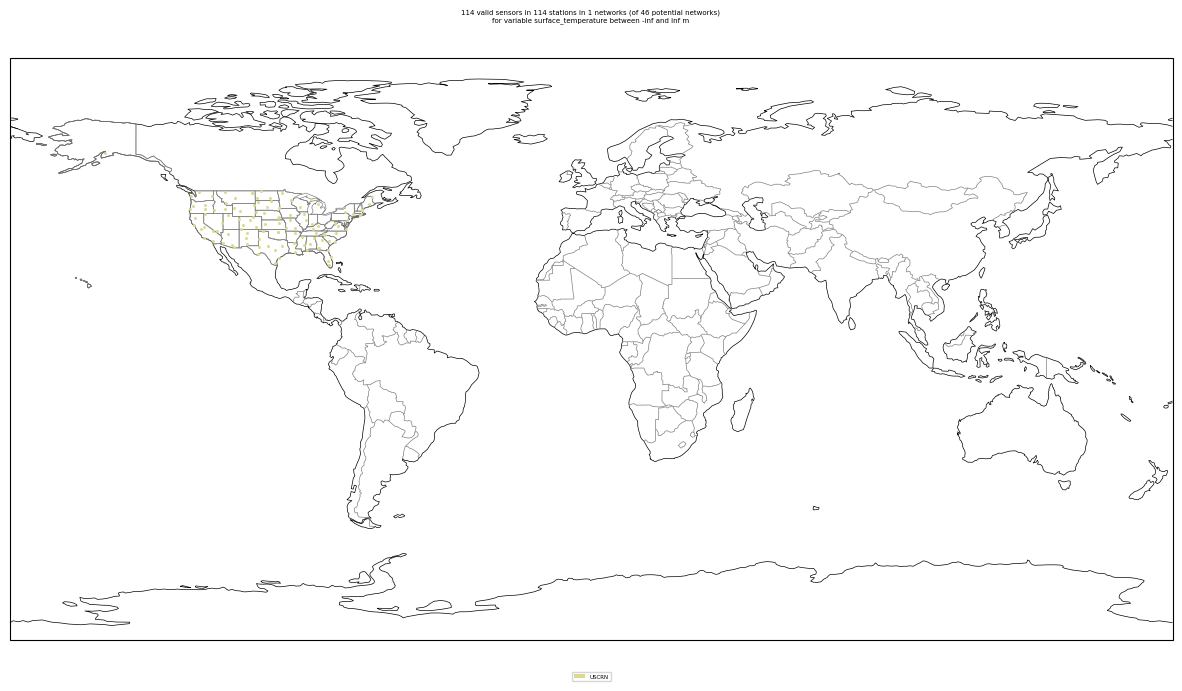

In [21]:
fig, ax = plt.subplots(
    1, 1, figsize=(15, 15), subplot_kw={"projection": ccrs.PlateCarree()}
)

ismn_data.plot_station_locations(variable="surface_temperature", ax=ax)

(None, <GeoAxes: >, (32, 1114, 5129))

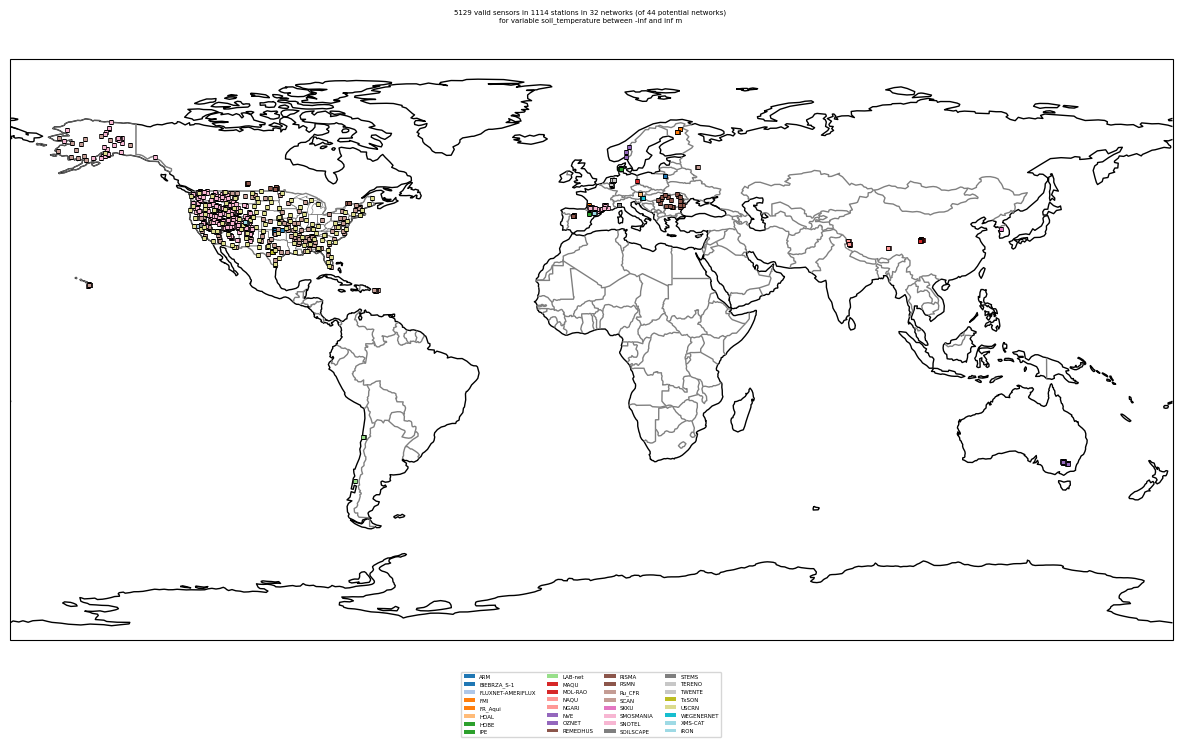

In [75]:
fig, ax = plt.subplots(
    1, 1, figsize=(15, 15), subplot_kw={"projection": ccrs.PlateCarree()}
)

ismn_data.plot_station_locations(variable="soil_temperature", ax=ax)

In [22]:
# Stations with soil temperature:

ids = ismn_data.get_dataset_ids(variable=["surface_temperature", "soil_temperature"])

st_data = ismn_data.subset_from_ids(ids)

Found existing ismn metadata in ..\data\raw\python_metadata\Data_separate_files_header_20170101_20171231_10665_0t0D_20240415.csv.


In [23]:
sensor_count = {}
total = 0
for __, __, sensor in st_data.collection.iter_sensors():

    if sensor.instrument in sensor_count.keys():
        sensor_count[sensor.instrument] += 1

    else:
        sensor_count[sensor.instrument] = 1
    total += 1
print(total)

2094


In [24]:
sensor_count

{'STP-1-A': 5,
 'STP-1-B': 5,
 'STP-1-C': 5,
 'Hydraprobe-II-Sdi-12-W': 28,
 'Hydraprobe-II-Sdi-12-S': 28,
 'Hydraprobe-II-Sdi-12-E': 28,
 'GS-3': 36,
 'TDT-B': 55,
 'TDT-A': 56,
 'STP01': 129,
 'TDT-C': 1,
 'TDT-D': 1,
 'Thermocouple-type-T': 15,
 '5TE': 34,
 '5TE-B': 2,
 '5TE-A': 2,
 'CS655-B': 4,
 'CS655-A': 4,
 'QMT103-C': 1,
 'QMT103-B': 1,
 'ThetaProbe-ML2X': 6,
 'ThetaProbe-ML2X-B': 1,
 'SPADE-Time-Domain-Transmissivity-A': 63,
 'SPADE-Time-Domain-Transmissivity-B': 15,
 'Decagon-5TE-A': 26,
 'Decagon-5TE-B': 24,
 'Decagon-5TE-C': 8,
 'CS650': 2,
 '107': 1,
 '109': 1,
 'ECH20-EC-TM': 22,
 'PT-100': 44,
 '5TM': 73,
 'UMS-Th3-s-daily-averages': 2,
 'Pt100-sensor-daily-averages': 1,
 'Stevens-Hydra-Probe': 36,
 'Hydraprobe-II-Sdi-12-A': 51,
 'Hydraprobe-II-Sdi-12-B': 50,
 'Hydraprobe-II-Sdi-12-C': 50,
 'Hydraprobe-II-A': 2,
 'Hydraprobe-II-B': 2,
 'Hydraprobe-II-C': 2,
 'Hydraprobe-Analog-(2.5-Volt)': 455,
 'Hydraprobe-Digital-Sdi-12-(2.5-Volt)': 90,
 'Hydraprobe-Digital-Sdi-12-The

(None, <GeoAxes: >, (46, 1647, 5647))

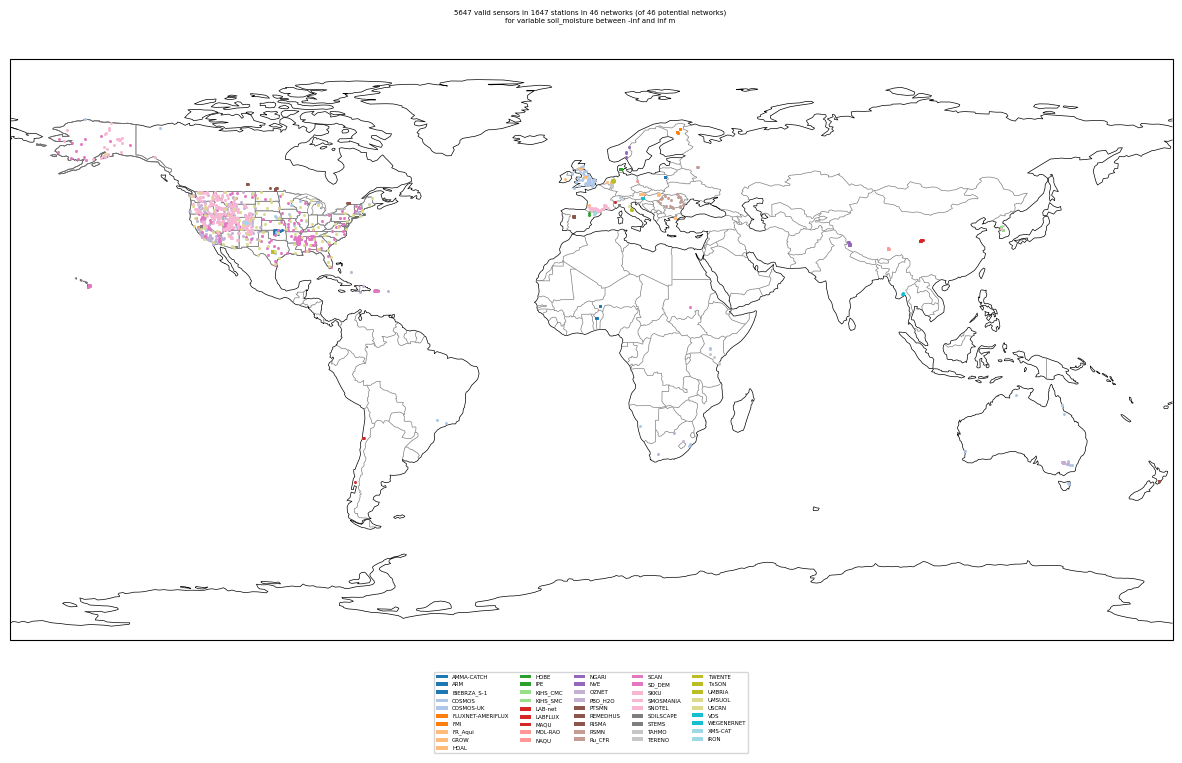

In [25]:
fig, ax = plt.subplots(
    1, 1, figsize=(15, 15), subplot_kw={"projection": ccrs.PlateCarree()}
)
ismn_data.plot_station_locations(variable="soil_moisture", ax=ax)

In [26]:
ids = ismn_data.get_dataset_ids(
    variable="surface_temperature", filter_meta_dict={"network": "COSMOS"}
)

uk_data = ismn_data.subset_from_ids(ids)

Found existing ismn metadata in ..\data\raw\python_metadata\Data_separate_files_header_20170101_20171231_10665_0t0D_20240415.csv.


In [27]:
uk_data

ismn.base.IsmnRoot Zip at ..\data\raw\Data_separate_files_header_20170101_20171231_10665_0t0D_20240415.zip
with Networks[Stations]:
------------------------

In [28]:
ismn_data["COSMOS"]["ARM-1"]

Station 'ARM-1' with Sensors: ['Cosmic-ray-Probe_soil_moisture_0.000000_0.190000']